## Plotting with numerical data

Python 으로 plot 을 그릴 때 가장 먼저 생각나는 도구는 matplotlib 입니다. 가장 오래된 패키지이며, 아마도 현재까지는 가장 널리 이용되고 있는 패키지라 생각됩니다. 하지만 matplotlib 은 그 문법이 복잡하고 arguments 이름들이 직관적이지 않아 그림을 그릴때마다 메뉴얼을 찾게 됩니다. 그리고 매번 그림을 그릴 때마다 몇 줄의 코드를 반복하여 작성하게 됩니다. Seaborn 은 이러한 과정을 미리 정리해둔, matplotlib 을 이용하는 high-level plotting package 입니다.

이 튜토리얼은 Seaborn=0.9.0 의 [official tutorial](https://seaborn.pydata.org/tutorial.html) 을 바탕으로, 추가적으로 알아두면 유용한 몇 가지 설명들을 더하였습니다. 기본적인 흐름과 예시는 official tutorials 을 참고하였습니다. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Seaborn 은 Pandas 와 궁합이 좋습니다. Pandas.DataFrame 의 plot 함수는 기본값으로 matplotlib 을 이용합니다. 그리고 seaborn 은 DataFrame 을 입력받아 plot 을 그릴 수 있도록 구현되어 있습니다. Seaborn 에서 제공하는 `tips` 데이터를 이용하여 몇 가지 plots 을 그려봅니다.

In [2]:
tips = sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Scatter plots

두 변수 간의 관계를 살펴볼 수 있는 대표적인 plots 으로는 scatter plot 과 line plot 이 있습니다. 우선 scatter plot 을 그리는 연습을 통하여 seaborn 의 기본적인 문법을 익혀봅니다.

`seaborn.scatterplot()` 에 tips 데이터를 이용한다는 의미로 `data=tips` 를 입력합니다. 이 중 `x` 로 'total_bill' 을, `y` 로 'tip' 을 이용하겠다고 입력합니다. 그러면 그림이 그려집니다.

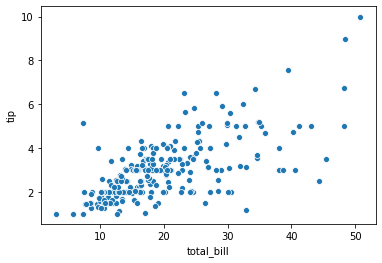

In [3]:
sns.scatterplot(x="total_bill", y="tip", data=tips)

흡연 유무에 따라 서로 다른 색을 칠할 수도 있습니다. 이는 `hue` 에 어떤 변수를 기준으로 다른 색을 칠할 것인지 입력하면 됩니다.

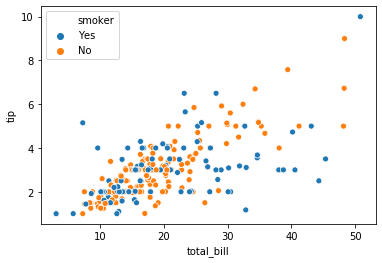

In [4]:
sns.scatterplot(x="total_bill", y="tip", hue="smoker", data=tips)

해당 변수값의 종류가 다양할 경우 각 종류별로 서로 다른 색이 칠해집니다.

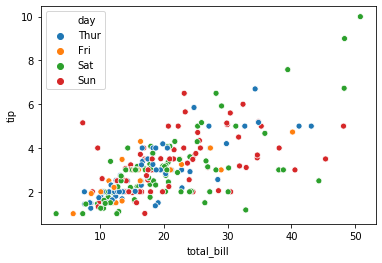

In [5]:
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips)

`hue` 에 입력되는 값이 명목형이 아닌 실수형일 경우, 그라데이션 형식으로 색을 입력해줍니다.

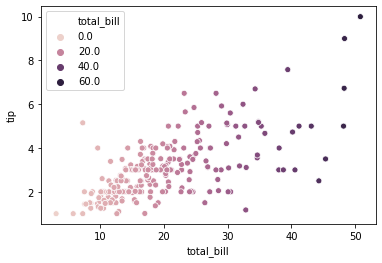

In [6]:
sns.scatterplot(x="total_bill", y="tip", hue="total_bill", data=tips)

Marker style 도 변경이 가능합니다. `style` 에 변수 이름을 입력하면 해당 변수 별로 서로 다른 markers 를 이용합니다. 이후 seaborn 의 style 에 대하여 알아볼텐데, `scatterplot()` 에서의 `style` argument 는 marker style 을 의미합니다.

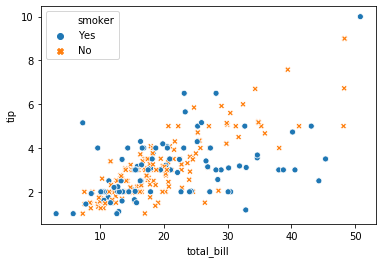

In [7]:
sns.scatterplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips)

Marker 의 크기도 조절이 가능합니다.

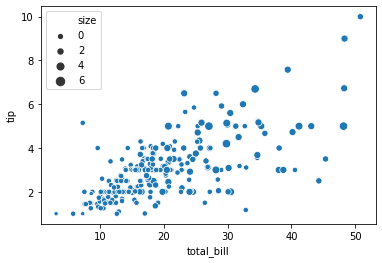

In [8]:
sns.scatterplot(x="total_bill", y="tip", size="size", data=tips)

또한 marker 크기의 상한과 하한도 설정할 수 있습니다.

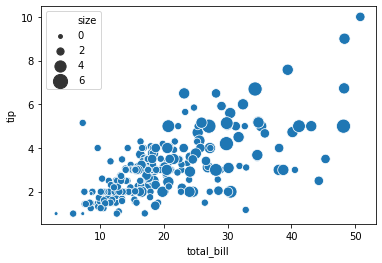

In [9]:
sns.scatterplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips)

`alpha` 는 투명도입니다 (0, 1] 사이의 값을 입력합니다.

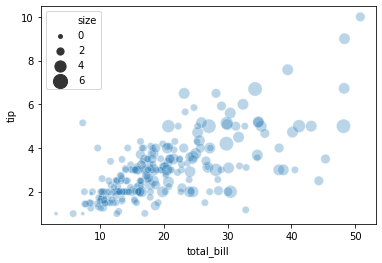

In [10]:
sns.scatterplot(x="total_bill", y="tip", size="size", sizes=(15, 200), alpha=.3, data=tips)

### relplot() vs scatterplot()

그리고 official tutorial 에서는 `seaborn.relplot()` 함수를 이용하여 이를 그릴 수 있다고 설명합니다. 그런데, 그 아래에 `relplot()` 은 `FacetGrid` 와 `scatterplot()` 과 `lineplot()` 의 혼합이라는 설명이 있습니다. 아직 우리가 한 번에 여러 장의 plots 을 그리는 일이 없었기 때문에 `scatterplot()` 과 `relplot()` 의 차이가 잘 느껴지지는 않습니다. 하지만 `scatterplot()` 에서 제공하는 모든 기능은 `relplot()` 에서 모두 제공합니다. 다른 점은 `relplot()` 은 `scatterplot()` 과 `lineplot()` 을 모두 호출하는 함수입니다. 어떤 함수를 호출할 지 `kind` 에 정의해야 합니다. 즉 `relplot(kind='scatter')` 를 입력하면 이 함수가 `scatterplot()` 함수를 호출합니다. `kind` 의 기본값은 scatter 이므로, scatter plot 을 그릴 때에는 이 값을 입력하지 않아도 됩니다. 

한 장의 scatter/line plot 을 그릴 때에도 `relplot()` 은 이용가능하기 때문에 이후로는 특별한 경우가 아니라면 `relplot()` 을 이용하도록 하겠습니다.

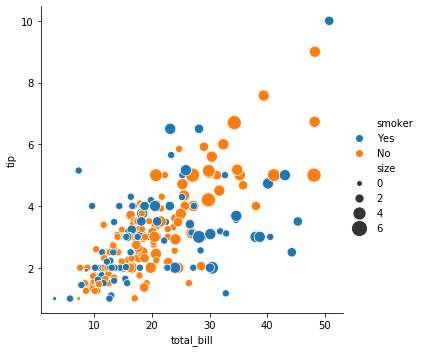

In [11]:
sns.relplot(x="total_bill", y="tip", hue="smoker", size="size", sizes=(15, 200), data=tips, kind='scatter')

그런데 `seaborn.relplot()` 함수를 실행시키면 그림이 그려진 것과 별개로 다음과 같은 글자가 출력됩니다. at 뒤의 글자는 함수를 실행할때마다 달라집니다. 이는 `relplot()` 함수가 return 하는 변수 설명으로, at 뒤는 메모리 주소입니다.

```
<seaborn.axisgrid.FacetGrid at 0x7f0dfda88278>
```

그리고 `seaborn.scatterplot()` 함수의 return 에는 FacetGrid 가 아닌 AxesSubplot 임도 확인할 수 있습니다. FacetGrid 는 1개 이상의 AxesSubplot 의 모음입니다. `seaborn.scatterplot()` 과 `seaborn.lineplot()` 은 한 장의 matplotlib Figure 를 그리는 것이며, `relplot()` 은 이들의 묶음을 return 한다는 의미입니다. 이 의미는 뒤에서 좀 더 알아보도록 하겠습니다. 중요한 점은 두 함수가 각각 무엇인가를 return 한다는 것입니다.

```
<matplotlib.axes._subplots.AxesSubplot at 0x7f0dfd9c7358>
```

이 return 된 변수를 이용하여 그림을 수정할 수 있습니다. 이제부터 어떤 변수가 return 됨을 명시적으로 표현하기 위하여 `seaborn.relplot()` 이나 `seaborn.scatterplot()` 을 실행한 뒤, 그 값을 변수 `g` 로 받도록 하겠습니다.

## Utils
### Title

대표적인 수정 작업 중 하나는 그림의 제목을 추가하는 것입니다. 위의 그림에 제목을 추가해봅니다.

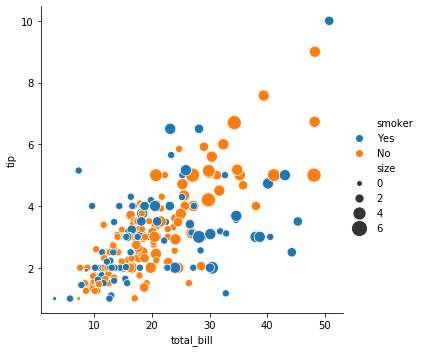

In [12]:
g = sns.relplot(x="total_bill", y="tip", hue="smoker", size="size", sizes=(15, 200), data=tips, kind='scatter')
g = g.set_titles('scatter plot example')

그런데 어떤 경우에는 (이유를 파악하지 못했습니다) 제목이 추가되지 않습니다. 이 때는 아래의 코드를 실행해보세요. Matplotlib 은 가장 최근의 그림 위에 plots 을 덧그립니다. 아래 코드는 이미 그려진 g 위에 제목을 추가하는 코드입니다.

Text(0.5, 1, 'scatter plot example')

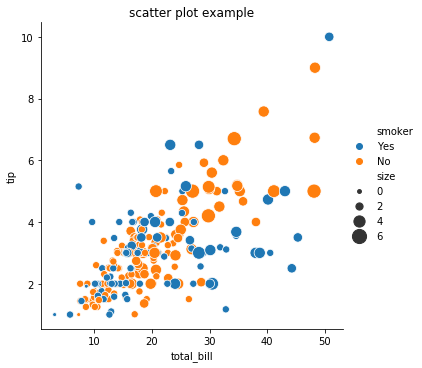

In [13]:
g = sns.relplot(x="total_bill", y="tip", hue="smoker", size="size", sizes=(15, 200), data=tips, kind='scatter')
plt.title('scatter plot example')

### Save

`relplot()` 함수를 실행할 때마다 새로운 그림을 그리기 때문에 이들을 변수로 만든 뒤, 각각 추가작업을 할 수 있습니다. 그 중 하나로 그림을 저장할 수 있습니다. 두 종류의 그림을 `g0`, `g1` 으로 만든 뒤, 각 그림을 `savefig` 함수를 이용하여 저장합니다. 저장된 그림을 살펴봅니다.

참고로 FacetGrid 는 `savefig` 기능을 제공하지만, AxesSubplot 은 이 기능을 제공하지 않습니다. 물론 `matplotlib.pyplot.savefig()` 함수나 `get_figure().savefig()` 함수를 이용하면 되지만, 코드가 조금 길어집니다. 이러한 측면에서도 `scatterplot()` 보다 `relplot()` 을 이용하는 것이 덜 수고스럽습니다.

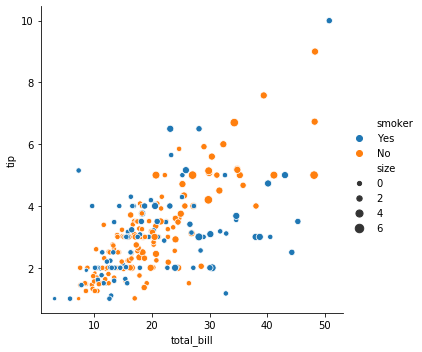

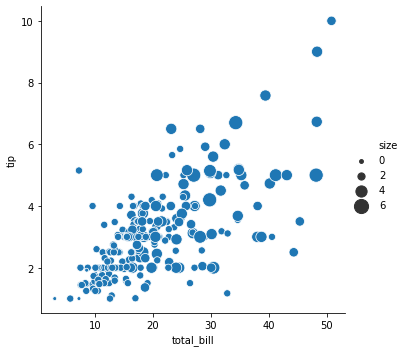

In [14]:
g0 = sns.relplot(x="total_bill", y="tip", hue="smoker", size="size", data=tips, kind='scatter')
g1 = sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips)

g0.savefig('total_bill_tip_various_color_by_size.png')
g1.savefig('total_bill_tip_various_size_by_size.png')

### Pandas.DataFrame.plot

Pandas 의 DataFrame 에는 손쉽게 plot 을 그리는 함수가 구현되어 있습니다. kind 에 plot 의 종류를, x, y, 그 외의 title 과 같은 attributes 를 keywords argument 형식으로 입력할 수 있습니다. 그런데 DataFrame 의 plot 함수의 return type 은 Figure 가 아닌, `AxesSubplot` 입니다. 앞서 언급한 것처럼 `AxesSubplot` 은 그림의 저장 기능을 직접 제공하지 않습니다. 대신 `AxesSubplot.get_figure()` 를 이용하여 Figure 를 만들면 `savefig` 를 이용할 수 있습니다.

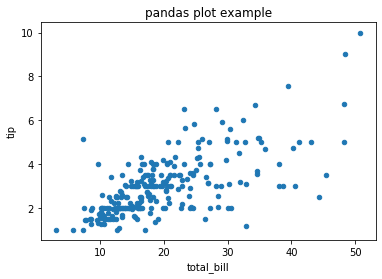

In [15]:
g = tips.plot(x='total_bill', y='tip', kind='scatter', title='pandas plot example')
g = g.get_figure()
g.savefig('pandas_plot_example.png')

혹은 matplotlib.pyplot.savefig 를 이용하여 AxesSubplot 상태에서 바로 저장할 수도 있습니다.

또한 위에서 return 을 변수로 받지 않고도 그림을 저장하였는데, 이는 matplotlib 은 어떤 그림을 저장할 것인지 설정하지 않으면 가장 마지막에 그린 그림에 대하여 저장을 수행합니다. 그런데 이런 코드는 혼동이 될 수 있기 때문에 코드가 한 줄 더 길어지지만, 저는 return type 을 명시하는 위의 방식을 선호합니다.

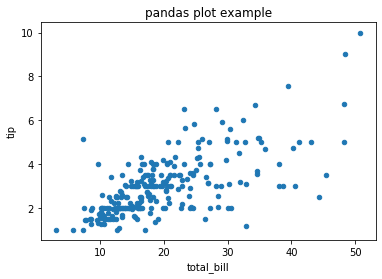

In [16]:
ax = tips.plot(x='total_bill', y='tip', kind='scatter', title='pandas plot example')
plt.savefig('pandas_plot_example_2.png')

### matplotlib.pyplot.close()

`seaborn.relplot()` 을 두 번 이용할 경우 각각의 그림이 그려졌습니다. 그런데 `seaborn.scatterplot()` 을 실행하면 두 그림이 겹쳐져 그려집니다. 이를 알아보기 위하여 random noise data 를 만들었습니다.

In [17]:
data = {
    'x': np.random.random_sample(100) * 50,
    'y': np.random.random_sample(100) * 10
}
random_noise_df = pd.DataFrame(data, columns=['x', 'y'])
random_noise_df.head(5)

,x,y
0,18.396646,5.066062
1,31.880603,8.057946
2,31.185105,6.290834
3,44.704170,9.046966
4,35.157031,7.049220


각각의 데이터를 `seaborn.scatterplot()` 에 넣으니 두 그림이 겹쳐져 그려집니다.

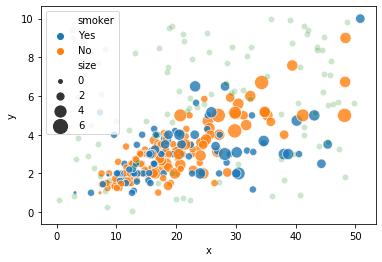

In [18]:
g0 = sns.scatterplot(x="total_bill", y="tip", hue='smoker', alpha=0.8, size="size", sizes=(15, 200), data=tips)
g1 = sns.scatterplot(x="x", y="y", alpha=0.2, color='g', data=random_noise_df)

실제로 g0, g1 의 메모리 주소가 같습니다.

In [19]:
g0, g1

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5c1afa5710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5c1afa5710>)

이 경우, 두 그림을 다르게 그리기 위해서는 `matplotlib.pyplot.close()` 함수를 중간에 실행시켜야 합니다. Matplotlib 은 현재의 Figure 가 명시적으로 닫히지 않으면 계속 그 Figure 위에 그림을 덧그리는 형식입니다. 그래서 앞서 `matplotlib.pyplot.title()` 함수를 실행하여 제목을 더할 수도 있었습니다. 즉 그림이 계속 수정된다는 의미입니다.

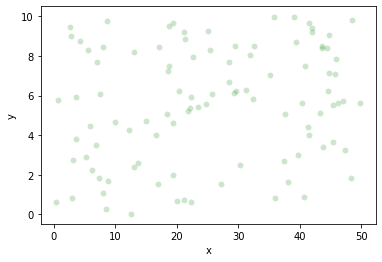

In [20]:
g0 = sns.scatterplot(x="total_bill", y="tip", hue='smoker', alpha=0.8, size="size", sizes=(15, 200), data=tips)
plt.close()
g1 = sns.scatterplot(x="x", y="y", alpha=0.2, color='g', data=random_noise_df)

그래서 중간에 `close()` 를 실행한 경우에는 각각의 그림에 대하여 제목을 추가하여 Figure 로 만들 수 있습니다.

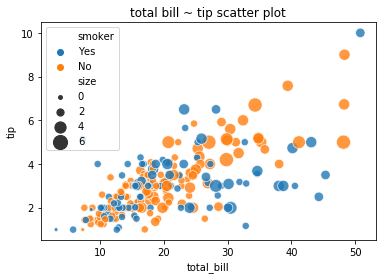

In [21]:
g0.set_title('total bill ~ tip scatter plot')
g0.get_figure()

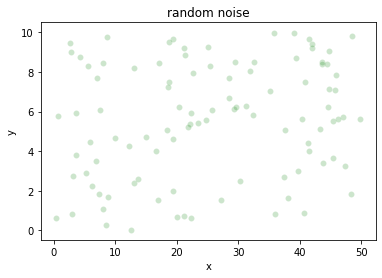

In [22]:
g1.set_title('random noise')
g1.get_figure()

이 때는 메모리 주소가 다릅니다.

In [23]:
g0, g1

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5c1af7dd30>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5c1aef1ac8>)

그럼 언제 `matplotlib.pyplot.close()` 가 실행될까요? `relplot()` 이 다시 호출될 때 이전에 그리던 Figure 를 닫고, 새 Figure 를 그리기 시작합니다.

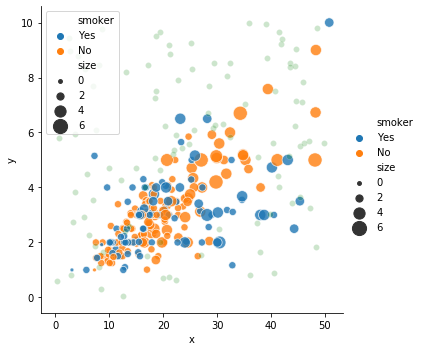

In [24]:
g0 = sns.relplot(x="total_bill", y="tip", hue='smoker', alpha=0.8, size="size", sizes=(15, 200), data=tips)
g1 = sns.scatterplot(x="x", y="y", alpha=0.2, color='g', data=random_noise_df)

그래서 `seaborn.scatterplot()` 을 실행한 뒤 `seaborn.relplot()` 을 실행하면 그림이 분리되어 그려집니다. 혼동될 수 있으니 새 그림이 그려질 때에는 습관적으로 `close()` 함수를 호출하는 것이 명시적입니다.

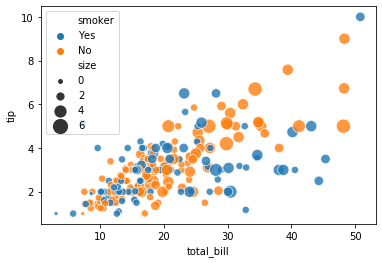

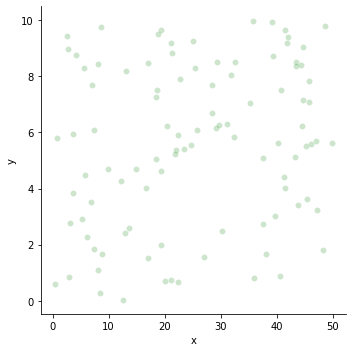

In [25]:
g0 = sns.scatterplot(x="total_bill", y="tip", hue='smoker', alpha=0.8, size="size", sizes=(15, 200), data=tips)
g1 = sns.relplot(x="x", y="y", alpha=0.2, color='g', data=random_noise_df)

## Plotting with numerical data 2
### Line plots

데이터가 순차적 형식일 경우 line plot 은 경향을 확인하는데 유용합니다. 우리는 임의의 시계열 데이터를 만들어 line plot 을 그려봅니다. `cumsum()` 함수는 지금까지의 모든 값을 누적한다는 의미입니다. 자연스러운 순차적 흐름을 지닌 데이터가 만들어질 겁니다.

In [26]:
data = {
    'time': np.arange(500),
    'value': np.random.randn(500).cumsum()
}
df = pd.DataFrame(data)
df.head(5)

,time,value
0,0,0.887376
1,1,-1.246091
2,2,0.468761
3,3,0.049719
4,4,-0.679810


`seaborn.lineplot()` 을 이용하여 `x` 와 `y` 축에 어떤 변수를 이용할지 정의합니다.

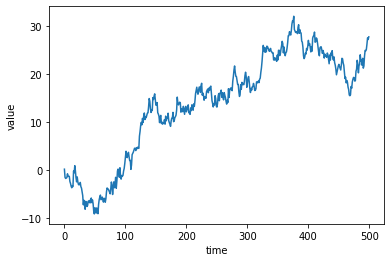

In [27]:
g = sns.lineplot(x="time", y="value", data=df)

이는 `relplot()` 에서 `kind` 를 'line' 으로 정의하는 것과 같습니다. 물론 return type 은 앞서 언급한것처럼 다릅니다.

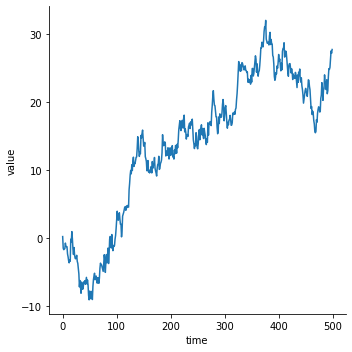

In [28]:
g = sns.relplot(x="time", y="value", kind="line", data=df)

위 데이터는 x 를 중심으로 데이터가 정렬된 경우입니다. 그런데 때로는 데이터가 정렬되지 않은 경우도 있습니다. 이를 위하여 임의의 2 차원 데이터 500 개를 생성합니다.

In [29]:
data = np.random.randn(500, 2).cumsum(axis=0)
df = pd.DataFrame(data, columns=["x", "y"])
df.head(5)

,x,y
0,0.568999,-0.805323
1,-3.756781,-0.687732
2,-2.478935,0.032900
3,-1.896840,-0.350074
4,-2.633141,-0.623276


`x` 를 기준으로 정렬되지 않았기 때문에 마치 좌표 위를 이동하는 궤적과 같은 line plot 이 그려졌습니다.

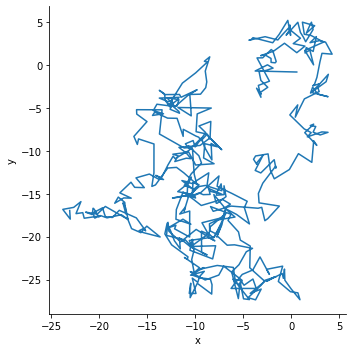

In [30]:
g = sns.relplot(x="x", y="y", sort=False, kind="line", data=df)

이를 x 축 기준으로 정렬하여 그리려면 `sort=True` 로 설정하면 됩니다. 시계열 형식의 데이터의 경우, 안전한 plotting 을 위하여 `sort` 는 기본값이 True 로 정의되어 있습니다.

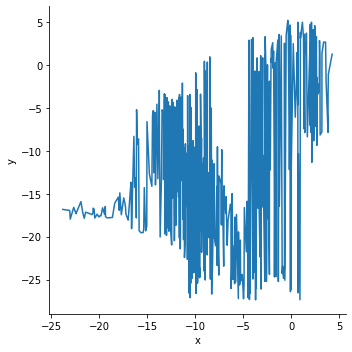

In [31]:
sns.relplot(x="x", y="y", sort=True, kind="line", data=df)

### Aggregation and representing uncertainty

`seaborn.lineplot()` 의 장점 중 하나는 신뢰 구간 (confidence interval) 과 추정 회귀선 (estminated line) 을 손쉽게 그려준다는 점입니다. 이를 알아보기 위하여 fMRI 데이터를 이용합니다. 이 데이터는 각 사람 (subject) 의 활동 종류 (event) 에 따라 각 시점 (timepoint) 별로 fMRI 의 측정값 중 하나의 센서값을 정리한 시계열 데이터입니다.

In [32]:
fmri = sns.load_dataset("fmri")
fmri.head(5)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


`lineplot()` 의 기본값은 신뢰 구간과 추정 회귀선을 함께 그리는 것입니다. 아래 그림은 subject 와 event 의 구분 없이 timepoint 별로 반복적으로 관측된 값을 바탕으로 그려진, 신뢰 구간과 추정 회귀선 입니다.

/home/lovit/anaconda3/envs/pytorch/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


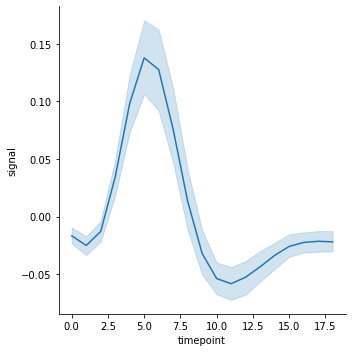

In [33]:
g = sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

신뢰 구간을 제거하기 위해서는 `ci` 를 None 으로 설정합니다. `ci` 는 confidence interval 의 약자입니다. 하지만 추정된 회귀선은 그려집니다.

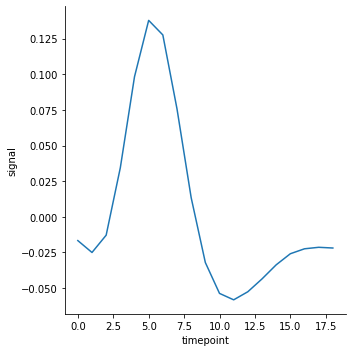

In [34]:
g = sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, ci=None)

혹은 데이터의 표준 편차를 이용하여 confidence interval 을 그릴 수도 있습니다.

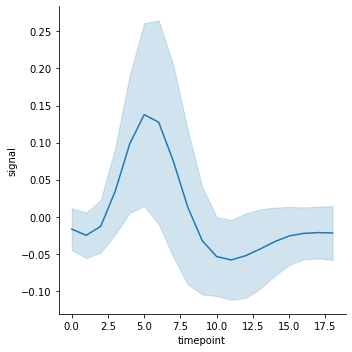

In [35]:
g = sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, ci="sd")

혹은 bootstrap sampling (복원 반복 추출) 을 이용하여 50 % 의 값을 confidence interval 로 이용할 경우에는 `ci=50` 을 입력합니다. 이 때 boostrap sampling 의 개수도 `n_boot`  에서 설정할 수 있습니다.

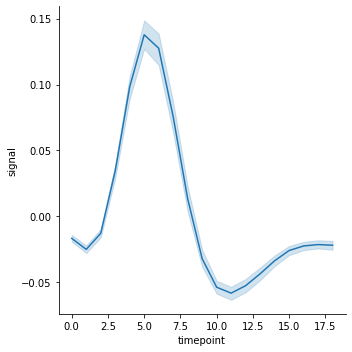

In [36]:
g = sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, ci=50, n_boot=5000)

추정 회귀선은 `estimator` 를 None 으로 설정하면 제거됩니다. 기본 추정 방법은 x 를 기준으로 moving windowing 을 하는 것입니다. 추정선이 없다보니 주파수처럼 signal 값이 요동치는 모습을 볼 수 있습니다.

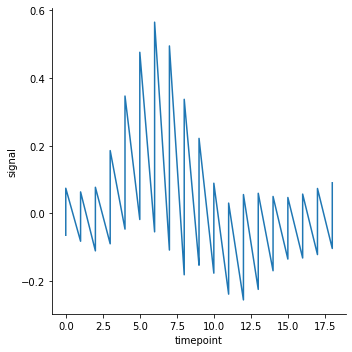

In [37]:
g = sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, estimator=None)

### Add conditions to line plot

`seaborn.lineplot()` 도 `seaborn.scatterplot()` 처럼 `hue` 와 `style` 을 설정할 수 있습니다.

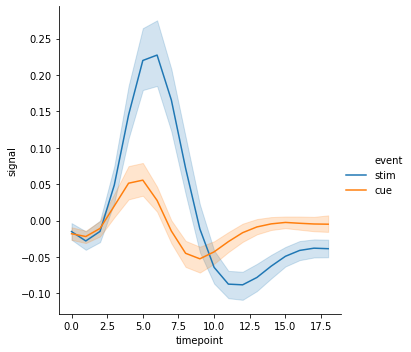

In [38]:
g = sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri)

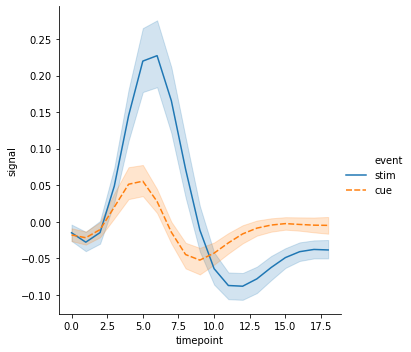

In [39]:
g = sns.relplot(x="timepoint", y="signal", hue="event", style="event", kind="line", data=fmri)

혹은 `hue` 와 `style` 을 다른 기준으로 정의하거나, 선 중간에 x 의 밀도에 따라 marker 를 입력할 수도 있습니다.

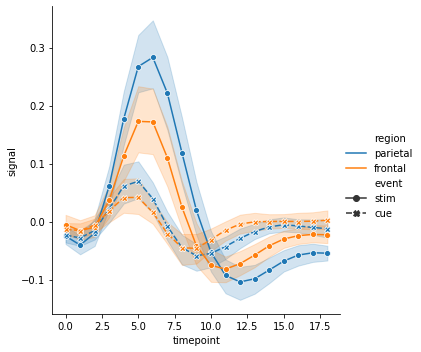

In [40]:
g = sns.relplot(x="timepoint", y="signal", hue="region", style="event",
    markers=True, kind="line", data=fmri)

혹은 선의 색은 'region' 에 따라 구분하지만, 각 선은 'subject' 를 기준으로 중복으로 그릴 경우 `units` 에 'subject' 를 입력합니다. 만약 `units` 을 설정하면 이때는 반드시 `estimator=None` 으로 설정해야 합니다. 여러 개의 'subject' 가 존재하다보니 선이 지저분하게 겹칩니다.

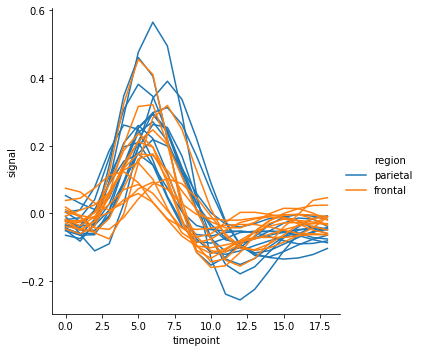

In [41]:
g = sns.relplot(x="timepoint", y="signal", hue="region",
    units="subject", estimator=None, kind="line",
    data=fmri.query("event == 'stim'"))

### Plotting with date data

시계열 형식의 데이터 중 하나는 x 축이 날짜 형식인 데이터입니다.

In [42]:
data = {
    'time': pd.date_range("2017-1-1", periods=500),
    'value': np.random.randn(500).cumsum()
}
df = pd.DataFrame(data)
df.head(5)

,time,value
0,2017-01-01,-0.641428
1,2017-01-02,0.324469
2,2017-01-03,0.732299
3,2017-01-04,-1.069557
4,2017-01-05,-2.109998


이 역시 `seaborn.lineplot()` 을 이용하여 손쉽게 그릴 수 있습니다. 추가로 `autofmt_xdate()` 함수를 이용하면 x 축의 날짜가 서로 겹치지 않게 정리를 도와줍니다.

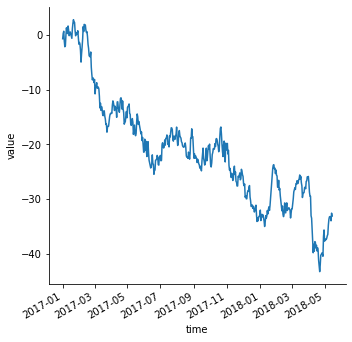

In [43]:
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

## multiple plots

앞서 `seaborn.scatterplot()` 과 `seaborn.relplot()` 의 return type 이 각각 `AxesSubplot` 과 `FacetGrid` 로 서로 다름을 살펴보았습니다. `seaborn.relplot()` 의 장점은 여러 장의 plots 을 손쉽게 그린다는 점입니다. 각 'subject' 별로 line plot 을 그려봅니다. 이때는 col 을 'subject' 로 설정한 뒤, col 의 최대 개수를 `col_wrap` 에 설정합니다. 'subject' 의 개수가 이보다 많으면 다음 row 에 이를 추가합니다. 몇 가지 유용한 attributes 도 함께 설정합니다. aspect 는 각 subplot 의 세로 대비 가로의 비율입니다. 세로:가로가 4:3 인 subplots 이 그려집니다. 그리고 세로의 크기는 `height` 로 설정할 수 있습니다.

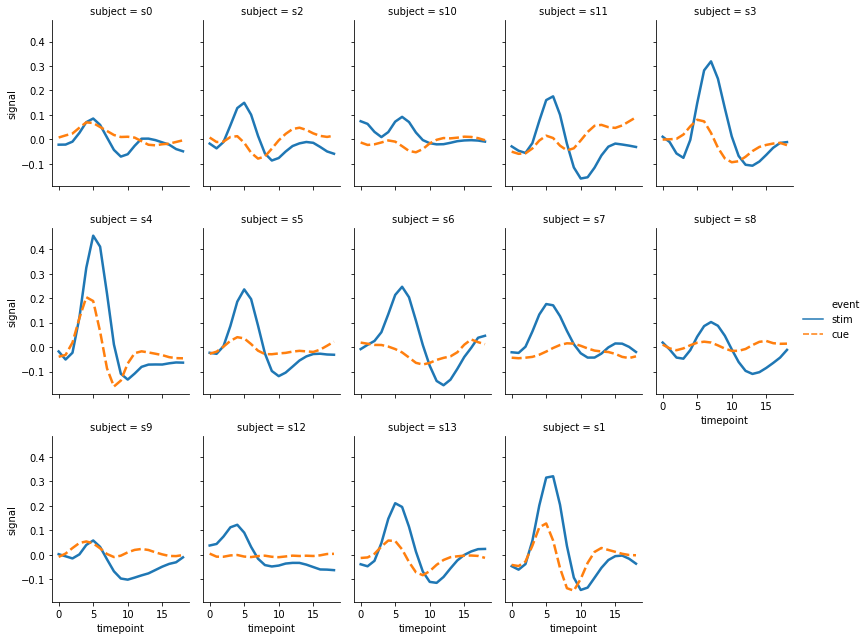

In [44]:
g = sns.relplot(x="timepoint", y="signal", hue="event", style="event",
    col="subject", col_wrap=5, height=3, aspect=.75, linewidth=2.5,
    kind="line", data=fmri.query("region == 'frontal'"))

그런데 위의 그림에서 `col` 의 값이 정렬된 순서가 아닙니다. 순서를 정의하지 않으면 데이터에 등장한 순서대로 이 값이 그려집니다. 이때는 사용자가 `col_order` 에 원하는 값을 지정하여 입력할 수 있습니다. `row` 역시 `row_order` 를 제공하니, `row` 단위로 subplots 을 그릴 때는 이를 이용하면 됩니다.

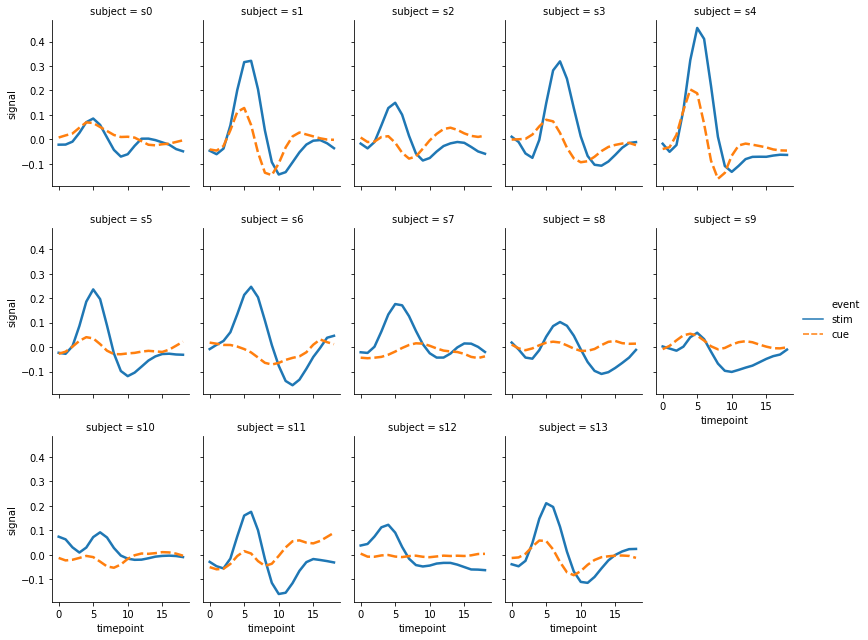

In [45]:
col_order = [f's{i}' for i in range(14)]

g = sns.relplot(x="timepoint", y="signal", hue="event", style="event",
    col="subject", col_wrap=5, height=3, aspect=.75, linewidth=2.5,
    kind="line", data=fmri.query("region == 'frontal'"),
    col_order=col_order
)

이는 scatter plot 에도 적용할 수 있습니다. 예를 들어 column 은 변수 'time' 에 따라 서로 다르게 scatter plot 을 그릴 경우, 다음처럼 `col` 에 'time' 을 입력합니다. `hue`, `size` 와 같은 설정은 공통으로 적용됩니다.

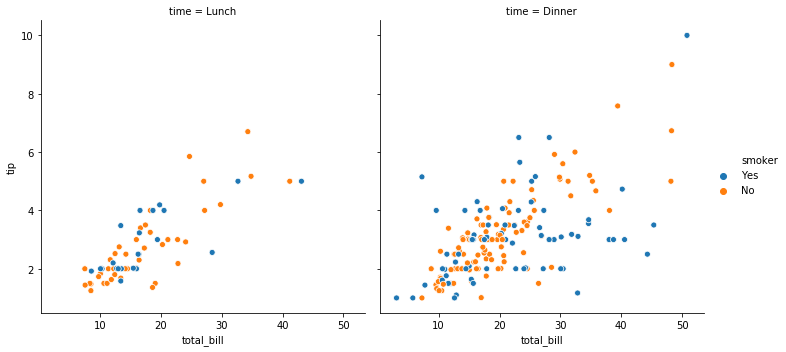

In [46]:
g = sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips, col="time")

`row` 를 성별 기준으로 정의하면 (2,2) 형식의 grid plot 이 그려집니다. 그런데 plot 마다 (sex, time) 이 모두 기술되니 title 이 너무 길어보입니다. 이후 살펴볼 FacetGrid 에서는 margin_title 을 이용하여 깔끔하게 col, row 의 기준을 표시하는 방법이 있습니다. 아마 0.9.0 이후의 버전에서는 언젠가 `seaborn.relplot()` 에도 그 기능이 제공되지 않을까 기대해봅니다.

In [ ]:
g = sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips, col="time", row="sex")